In [6]:
import os
import numpy as np
import matplotlib.pyplot as plt

In [13]:
qualimap_data=1
if qualimap_data:
    reads_per_bin = {}
    norm_reads_per_bin = {}
    for i in range(1,5):
        path = f'/tmp/Mazutislab-out/Ignas/RT_comparison/qualimap_plots/sample_{i}/raw_data_qualimapReport/coverage_profile_along_genes_(total).txt'
        reads_per_bin[i] = np.array([])
        norm_reads_per_bin[i] = np.array([])
        for j, line in enumerate(open(path)):
            if j>0:
                line = line.split('\t')
                reads_per_bin[i] = np.append(reads_per_bin[i], float(line[1]))
        norm_reads_per_bin[i] = reads_per_bin[i].copy()/sum(reads_per_bin[i])
else:
    path = f'/tmp/Mazutislab-out/Ignas/RT_comparison/coverage_plots/genes_medium_counts/'
    coverage_file_path = path + 'comparison.geneBodyCoverage.txt'

In [14]:
print(reads_per_bin[4])

[ 912.73057063 1052.20869899 1084.16026134 1114.21023879 1153.75166008
 1184.65925904 1215.86122793 1241.29507211 1274.36999188 1308.96504071
 1316.47394461 1316.35424835 1325.03064916 1351.27087162 1354.18770296
 1371.18302959 1362.84961934 1357.9697667  1357.13719781 1349.6024681
 1365.77416642 1394.63385894 1424.22418454 1462.48065623 1477.38084991
 1476.3892977  1501.66085173 1528.32438199 1574.12347035 1647.9147913
 1698.00905891 1756.49200235 1774.69697674 1813.06728922 1868.87385777
 1920.94976706 1978.82936702 2011.93979595 2053.13060319 2079.67324475
 2089.01973838 2131.03912414 2185.94703626 2232.05339042 2279.96954816
 2348.93273959 2414.86592759 2470.30956648 2501.60166406 2555.94396761
 2642.47011729 2753.61644649 2774.66048    2760.01340478 2742.85713518
 2786.45528829 2798.83594412 2840.32298809 2888.04180059 2919.66844839
 2967.69084412 2992.29488834 3061.52507797 3123.26881029 3175.79419293
 3254.52230797 3347.74798465 3405.89606841 3456.81691795 3522.39069161
 3573.63

In [3]:
if qualimap_data==0:
    reads_per_bin = {}
    norm_reads_per_bin = {}
    i = 0
    
    for line in open(coverage_file_path):
        if not line.startswith('Percentile'):
            line = line.split('\t')
            key = line[0]
            values = np.fromstring('\t'.join(line[1:]), sep = '\t', dtype=float)
            reads_per_bin[key] = values
            norm_reads_per_bin[key] = values/sum(values)
    #print(reads_per_bin)
        

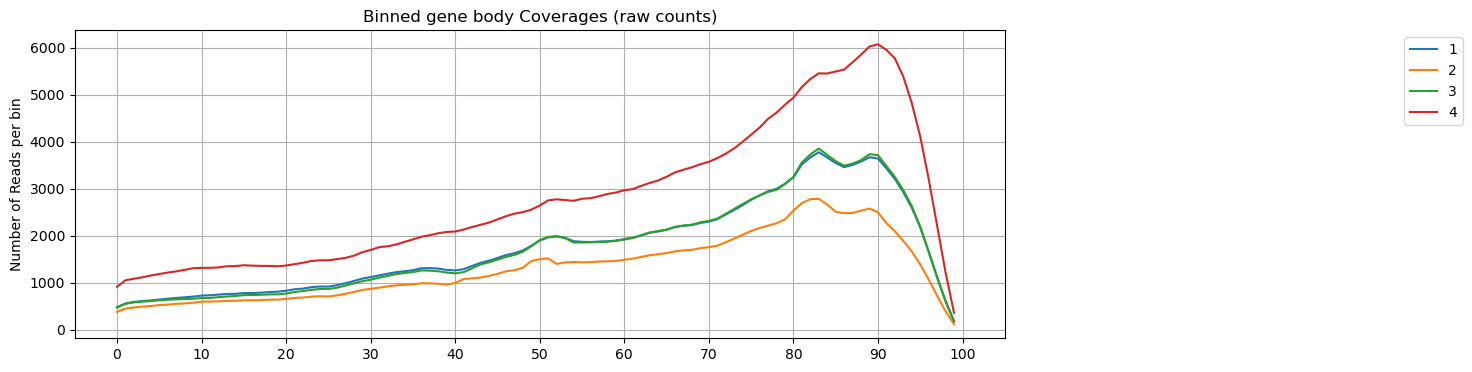

In [15]:
main_height = 4
fig, ax1 = plt.subplots(1,1,figsize=(12, main_height))
for key, values in reads_per_bin.items():
    ax1.plot(values, label=key)
ax1.xaxis.set_ticks(np.arange(0, 101, 10))
ax1.set_xlim(-5,105)
ax1.grid(True)
ax1.set_ylabel('Number of Reads per bin')
#ax2.plot(total_coverage, color='black', linestyle=':', label=f'exonic coverage (from {len(exon_coverages)} transcript variants)')
#i=1

plt.title(f'Binned gene body Coverages (raw counts)')
fig.legend(loc="upper right", bbox_to_anchor=(1.5,1), bbox_transform=ax1.transAxes)
plt.savefig(path + 'raw_coverage.png', bbox_inches = 'tight')
plt.show()

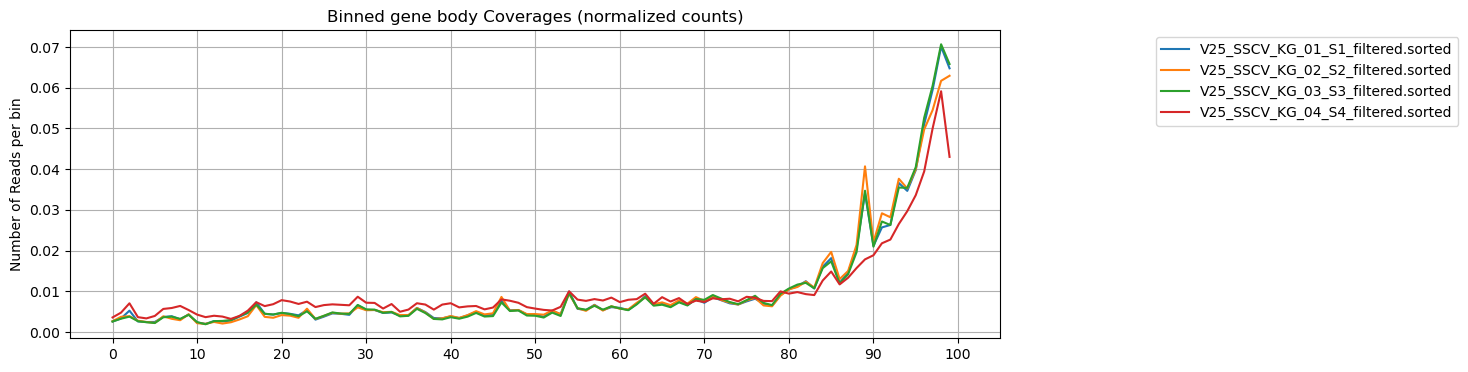

In [5]:
main_height = 4
fig, ax1 = plt.subplots(1,1,figsize=(12, main_height))
for key, values in norm_reads_per_bin.items():
    ax1.plot(values, label=key)
ax1.xaxis.set_ticks(np.arange(0, 101, 10))
ax1.set_xlim(-5,105)
ax1.grid(True)
ax1.set_ylabel('Number of Reads per bin')
#ax2.plot(total_coverage, color='black', linestyle=':', label=f'exonic coverage (from {len(exon_coverages)} transcript variants)')
#i=1

plt.title(f'Binned gene body Coverages (normalized counts)')
fig.legend(loc="upper right", bbox_to_anchor=(1.5,1), bbox_transform=ax1.transAxes)
plt.savefig(path + 'norm_coverage.png', bbox_inches = 'tight')
plt.show()